
# SPECULA Adaptive Optics Tutorial: Basics
#
# This tutorial demonstrates the use of SPECULA (Simulation Package for Adaptive Optics with Python) using some simple examples.
#
# **Presenter**: [Fabio Rossi]
# **Authors**: [Fabio Rossi, Guido Agapito, Alfio Puglisi]
# **SPECULA Repository**: https://github.com/ArcetriAdaptiveOptics/SPECULA
# **Documentation**: https://specula.readthedocs.io/



# 1.1 Installation

In [1]:
%%capture
# optional, to have diagrams work
! apt-get install -y libcairo2-dev pkg-config python3-dev
! pip install pycairo orthogram

In [2]:
! pip install specula==1.0.1 -q
! pip install pyyaml numpy matplotlib scipy ipywidgets -q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 405.5/405.5 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.6/79.6 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.7/59.7 kB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 20.5 MB/s eta 0:00:00


# 1.2 Mounting Google Drive for data storage*

In [3]:
from google.colab import drive
import sys
notebook_stdout = sys.stdout

drive.mount('/content/drive')

import os
from pathlib import Path
import sys
from PIL import Image

base_path = '/content/drive/MyDrive/HandsOnSPECULA'
calibration_path = os.path.join(base_path, 'calibration')

os.makedirs(base_path, exist_ok=True)
os.makedirs(calibration_path, exist_ok=True)


Mounted at /content/drive


# 1.3 Running our first simulation

In [4]:
import yaml


simulation_filename = 'params_pyr_soul.yml'
simulation_path = os.path.join(base_path, simulation_filename)

with open(simulation_path, 'r') as file:
    data = yaml.safe_load(file)

print(yaml.dump(data, default_flow_style=False, sort_keys=False))

main:
  class: SimulParams
  root_dir: /content/drive/MyDrive/HandsOnSPECULA/calibration
  pixel_pupil: 220
  pixel_pitch: 0.037372727
  total_time: 0.01
  time_step: 0.001
  zenithAngleInDeg: 0.0
  display_server: false
seeing:
  class: WaveGenerator
  constant: 0.8
wind_speed:
  class: WaveGenerator
  constant:
  - 2.0
  - 4.0
  - 6.0
  - 25.0
wind_direction:
  class: WaveGenerator
  constant:
  - 0.0
  - 0.0
  - 0.0
  - 0.0
on_axis_source:
  class: Source
  polar_coordinates:
  - 0.0
  - 0.0
  magnitude: 8
  wavelengthInNm: 750
pupilstop:
  class: Pupilstop
  simul_params_ref: main
atmo:
  class: AtmoEvolution
  simul_params_ref: main
  L0: 40
  heights:
  - 119.0
  - 837
  - 3045
  - 12780
  Cn2:
  - 0.7
  - 0.06
  - 0.14
  - 0.1
  fov: 240.0
  seed: 1
  inputs:
    seeing: seeing.output
    wind_speed: wind_speed.output
    wind_direction: wind_direction.output
  outputs:
  - layer_list
prop:
  class: AtmoPropagation
  simul_params_ref: main
  source_dict_ref:
  - on_axis_source
 

In [5]:
import specula
specula.init(0)  # Default target device GPU0

Cupy import failed. SPECULA will fall back to CPU use.
Default device is CPU


In [6]:
sys.stdout = open('log1_3.txt', 'w')
specula.main_simul(yml_files=[ os.path.join(base_path, 'params_pyr_soul.yml')],
                   diagram=True, diagram_filename='/content/drive/MyDrive/HandsOnSPECULA/SOUL_diagram.png',
                   diagram_title='SOUL_diagram')
sys.stdout = notebook_stdout

# *1.4* Resulting simulation *Diagram*




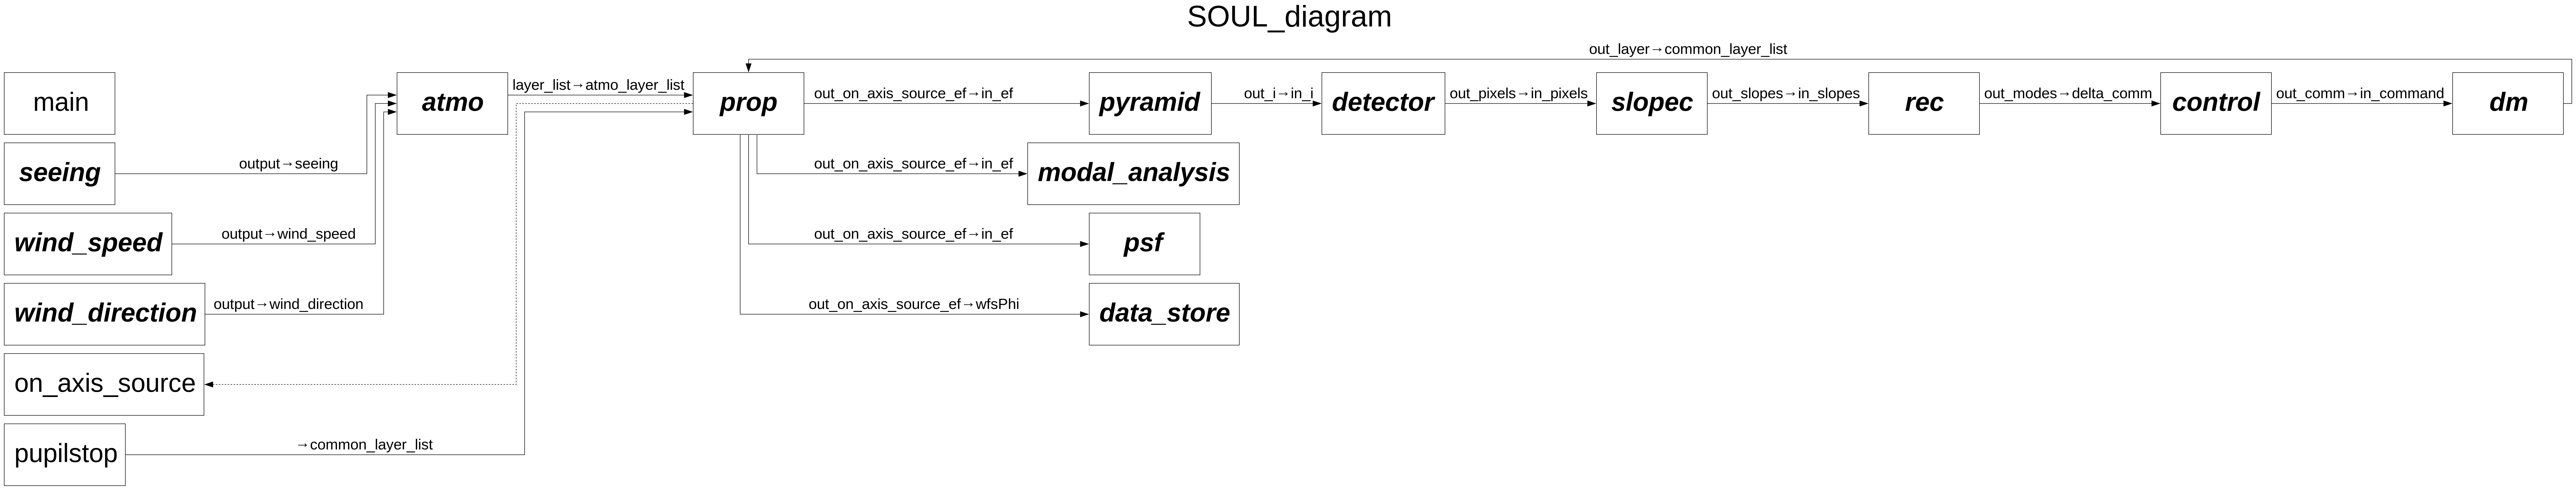

In [7]:
Image.open('/content/drive/MyDrive/HandsOnSPECULA/SOUL_diagram.png')



# 1.5 Adding plots with an Override


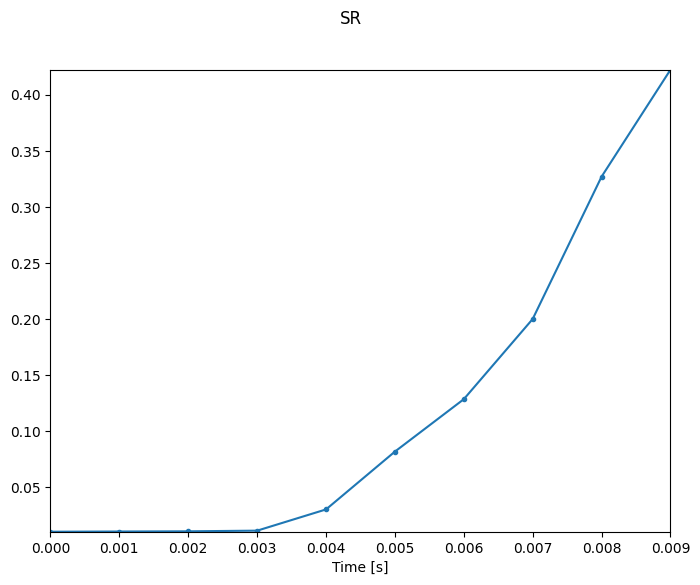

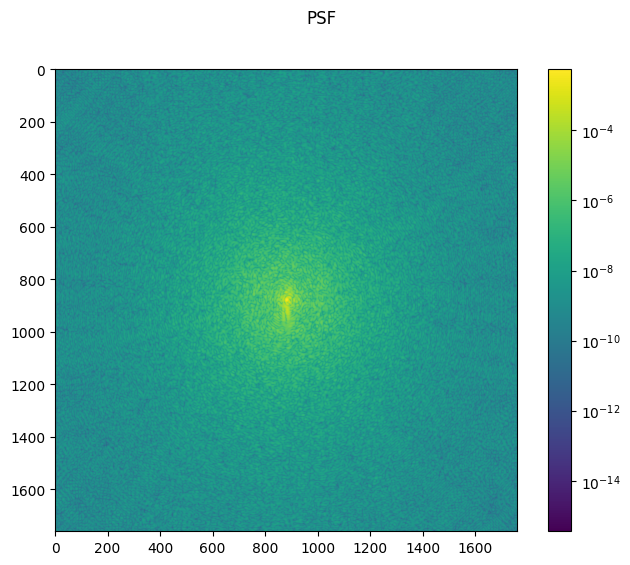

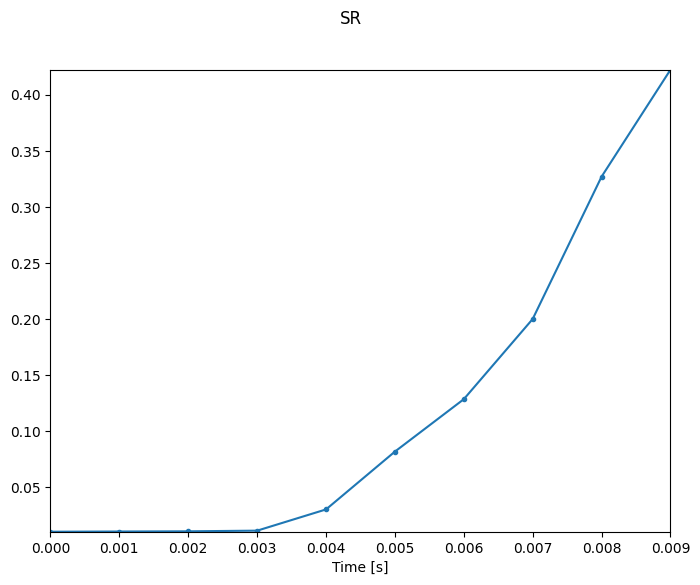

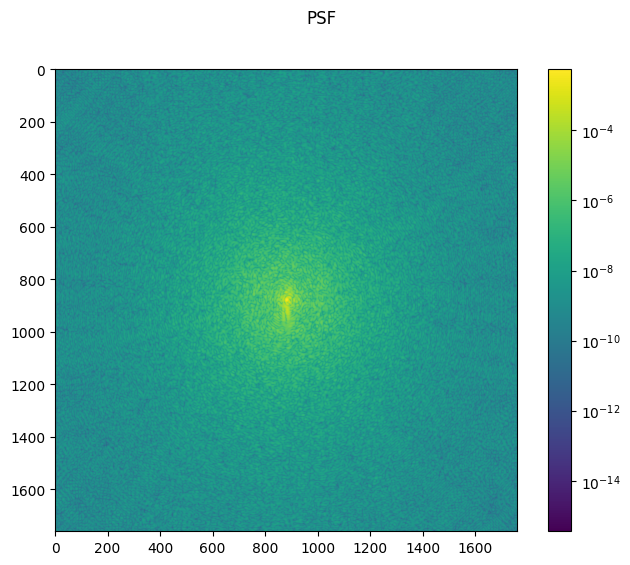

In [8]:
sys.stdout = open('log1_5.txt', 'w')
specula.main_simul(yml_files=[os.path.join(base_path,'params_pyr_soul.yml'),
                              os.path.join(base_path,'ov_add_display.yml')])
sys.stdout = notebook_stdout



# 1.6 Simulation Replay and its diagram



In [ ]:
sys.stdout = notebook_stdout
specula.main_simul(yml_files=[ os.path.join(base_path, 'output/20260206_085619/replay_params.yml')],
                   diagram=True, diagram_filename='/content/drive/MyDrive/HandsOnSPECULA/SOUL_diagram_replay.png',
                   diagram_title='SOUL_diagram Replay')

Cupy import successfull. Installed version is: 13.6.0
Default device is GPU number  0
['/content/drive/MyDrive/HandsOnSPECULA/output/20260206_085619/replay_params.yml']
self.diagram_colors_on False
Reading parameters from /content/drive/MyDrive/HandsOnSPECULA/output/20260206_085619/replay_params.yml
overrides: []
self.trigger_order=['main', 'seeing', 'wind_speed', 'wind_direction', 'on_axis_source', 'pupilstop', 'data_source', 'atmo', 'pyramid', 'modal_analysis', 'psf', 'detector', 'slopec', 'rec', 'control', 'dm']
self.trigger_order_idx=[0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 3, 4, 5, 6]
AtmoEvolution: zenith angle is defined as: 0.0 deg
AtmoEvolution: airmass is: 1.0
FoV reduction from 4.14 to 2.00 will be performed with a focal plane mask
Restoring: /content/drive/MyDrive/HandsOnSPECULA/calibration/ifunc/KLmatrix_KL_v10_inv.fits
None 	cupy memory used by IFuncInv: 176.15625 MB
Restoring: /content/drive/MyDrive/HandsOnSPECULA/calibration/pupils/soul_KLv10_ps220p0.037_pyr40x40_wl750_fv2.

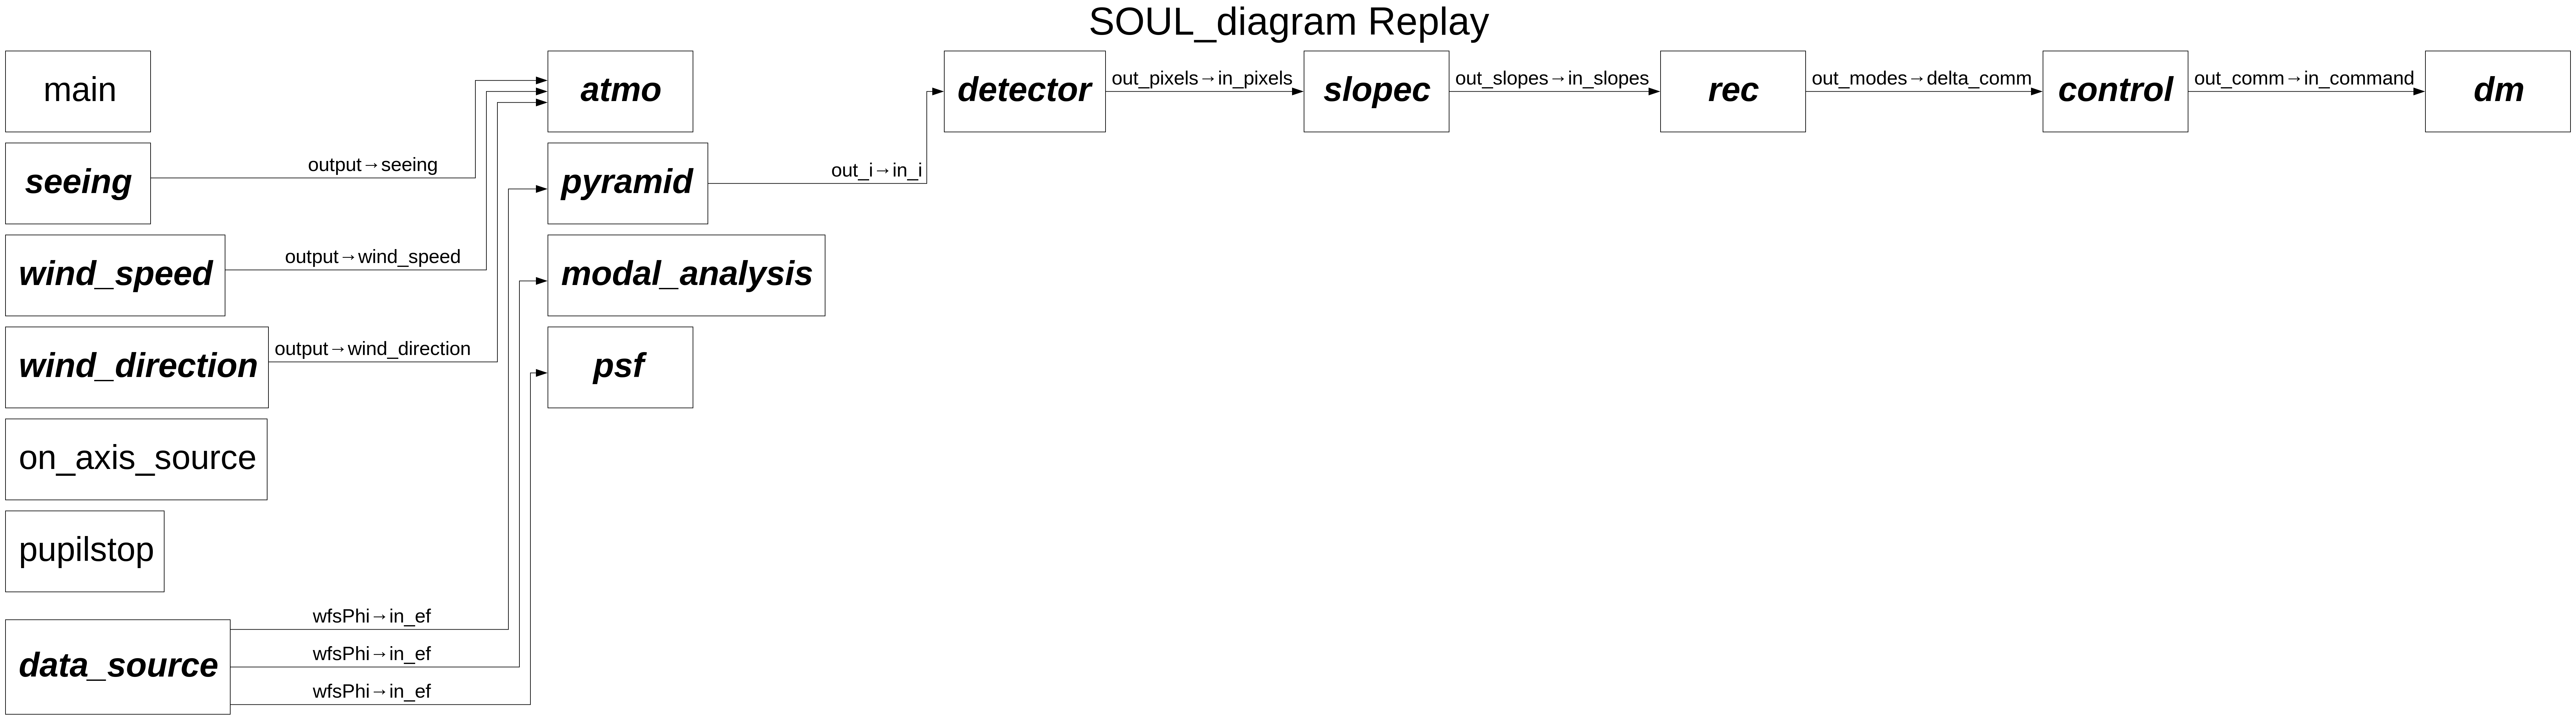

In [ ]:
Image.open('/content/drive/MyDrive/HandsOnSPECULA/SOUL_diagram_replay.png')

# 1.7 Calibration example

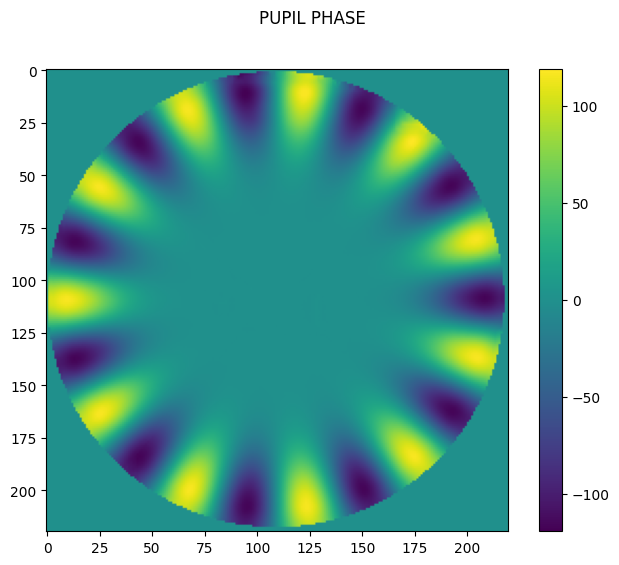

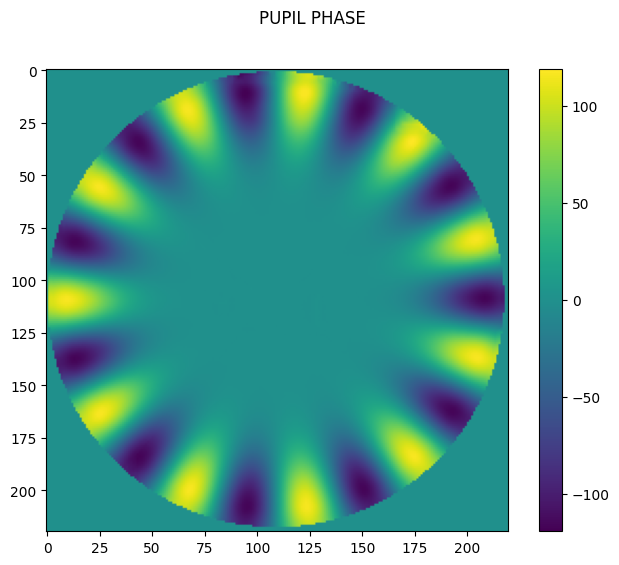

In [ ]:
sys.stdout = open('log1_6.txt', 'w')
specula.main_simul(yml_files=[os.path.join(base_path,'params_pyr_soul.yml'), os.path.join(base_path,'calib_pyr_rec.yml')])
sys.stdout = notebook_stdout